Feature #: 
0


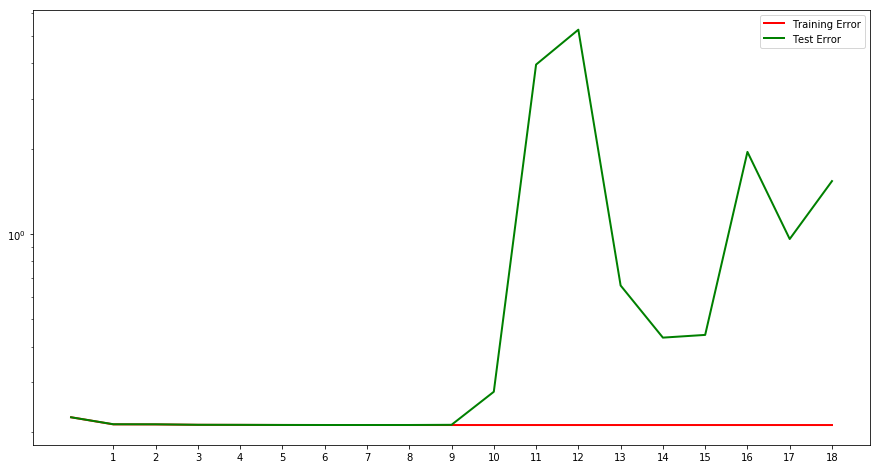

Feature #: 
1


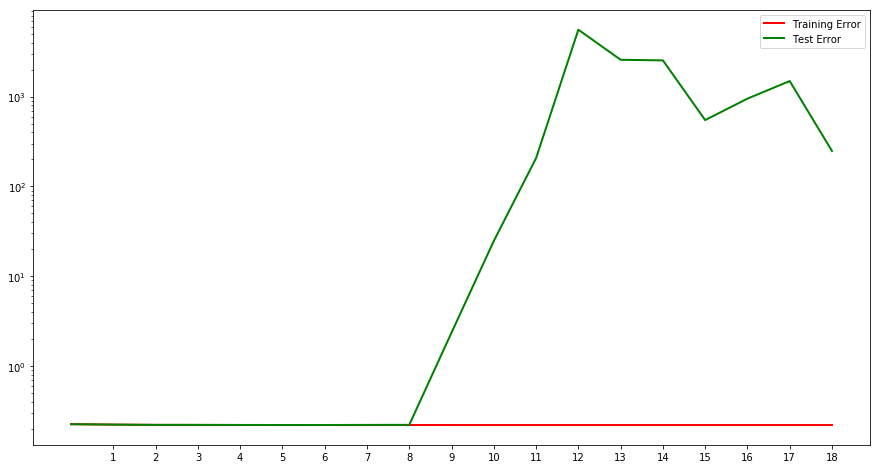

Feature #: 
2


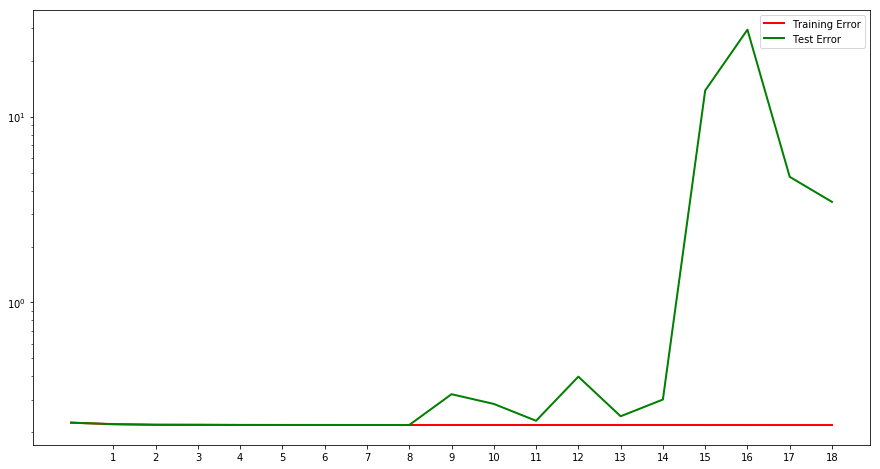

Feature #: 
3


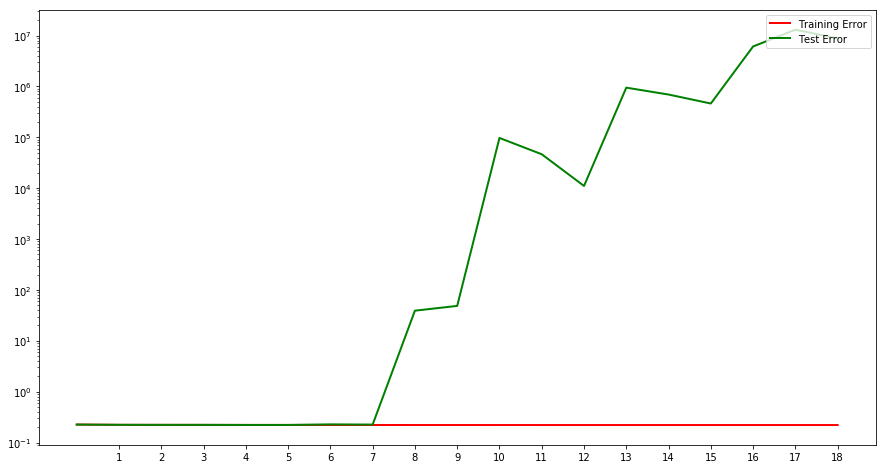

Feature #: 
4


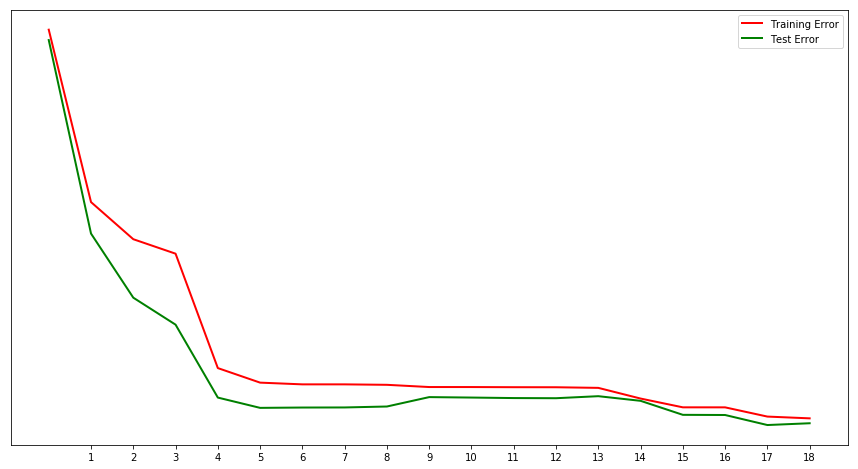

Feature #: 
5


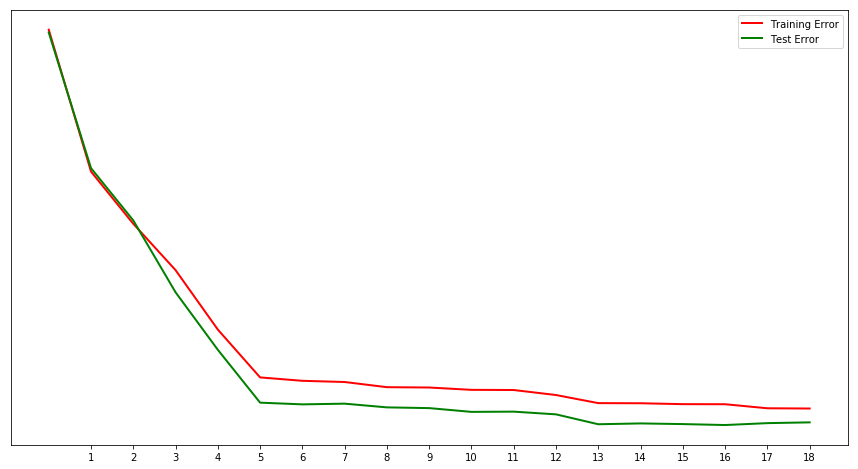

Feature #: 
6


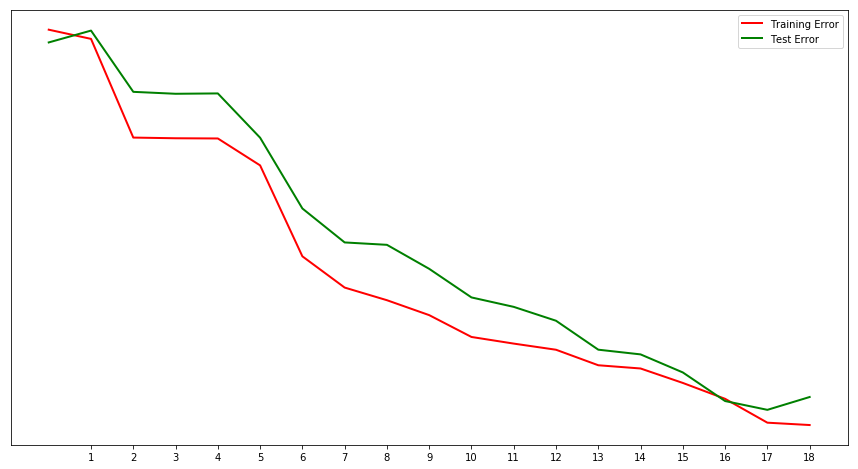

Feature #: 
7


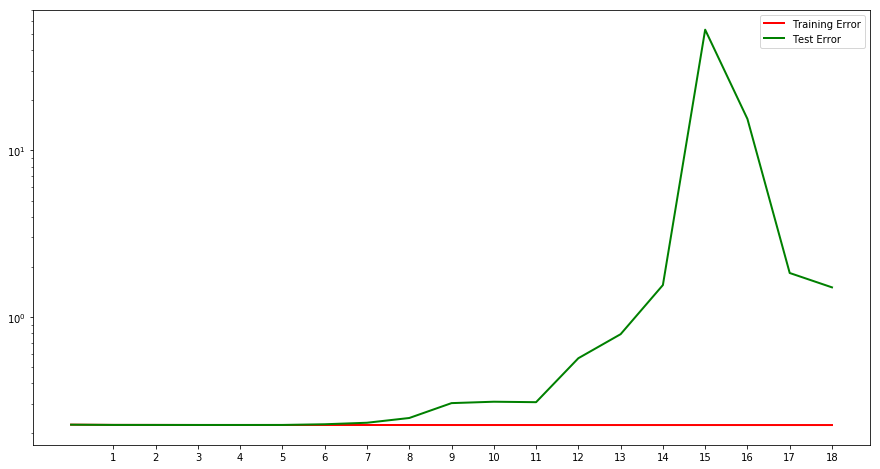

Feature #: 
8


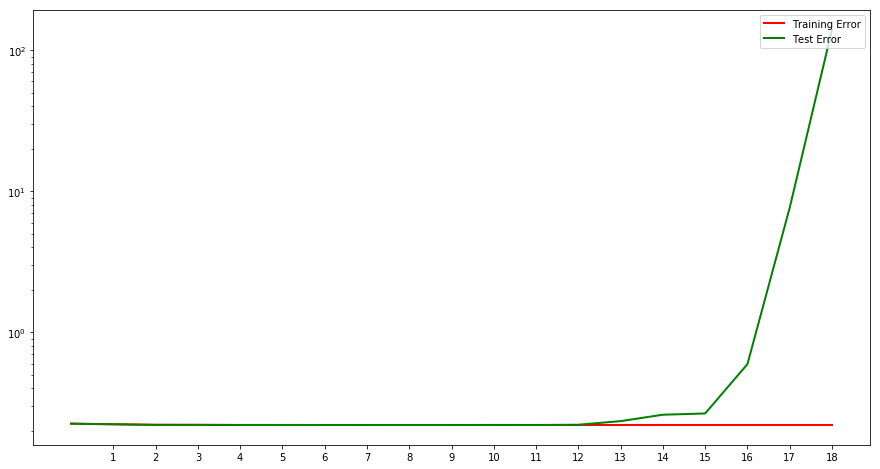

Feature #: 
9


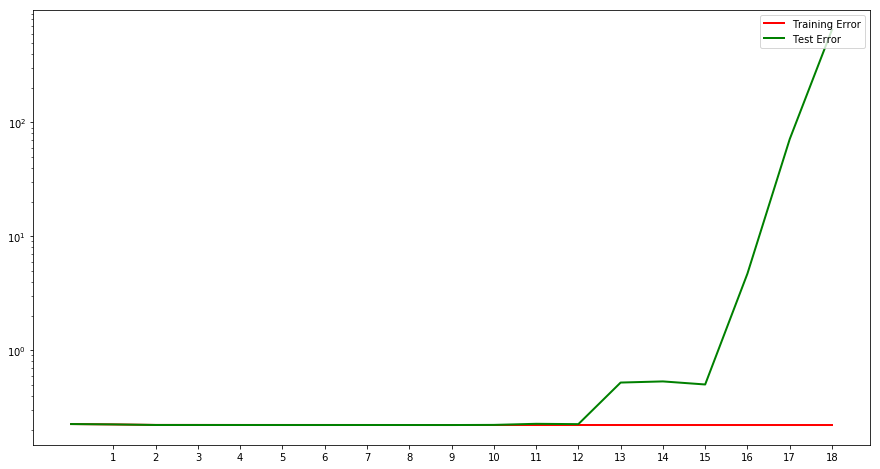

Feature #: 
10


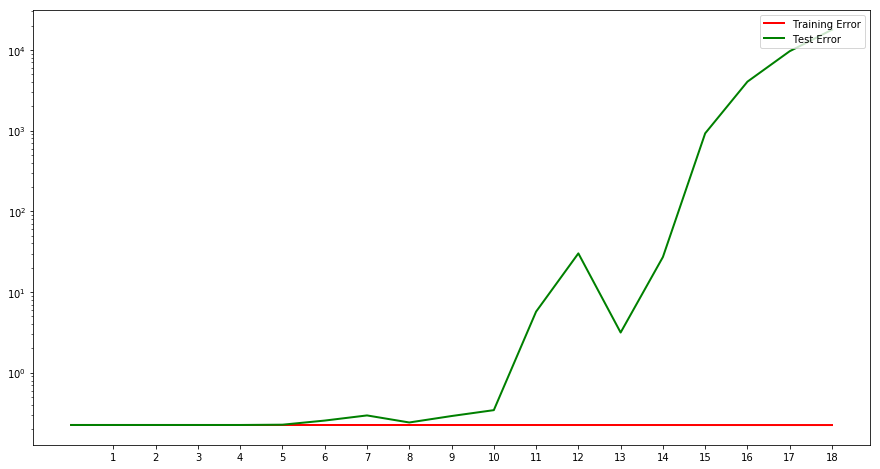

Feature #: 
11


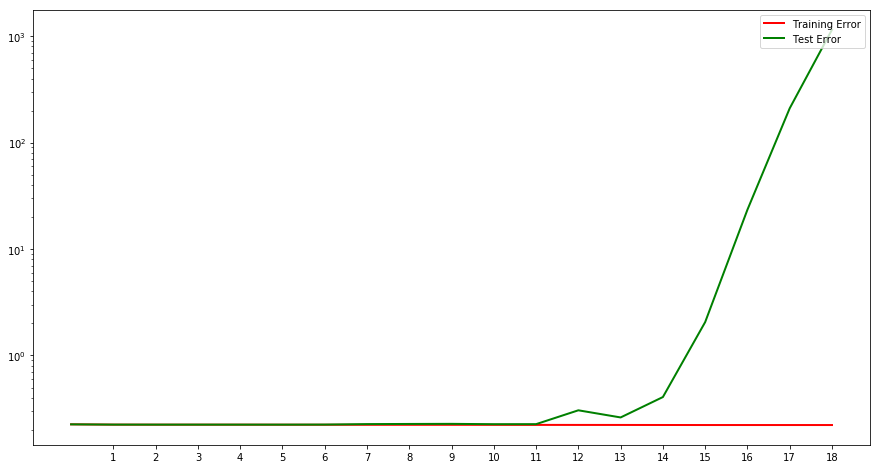

Feature #: 
12


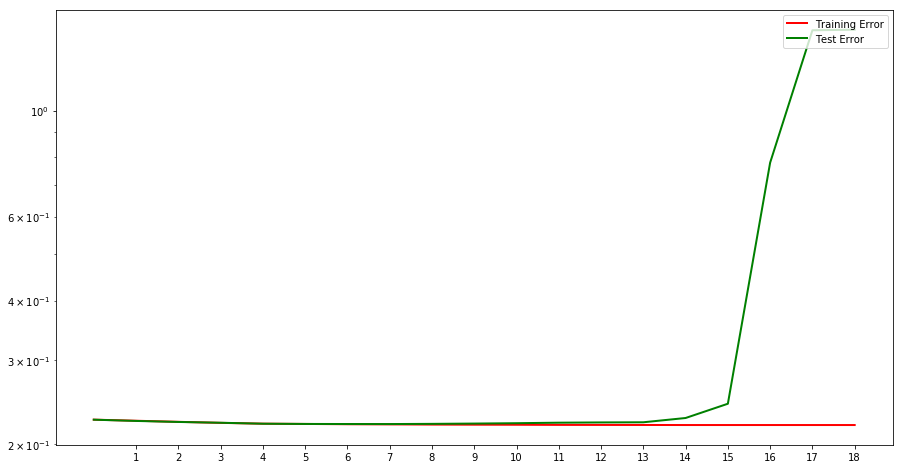

Feature #: 
13


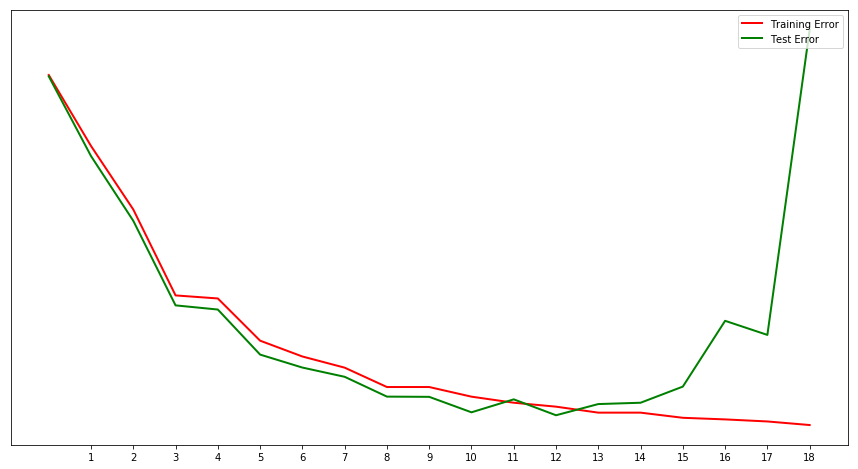

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
%matplotlib inline


X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)

for i in range(0,14):
    
    degrees = np.array(range(0,19))
    learners = [ [] ]*len(degrees)
    errT = np.zeros((len(degrees),))
    errV = np.zeros((len(degrees),))

    for degree in degrees:
        XtrP = ml.transforms.fpoly(Xtr[:,i].reshape(150000,1), degree, bias=False) # generate polynomial feature
        XtrP, params = ml.transforms.rescale(XtrP) # normalize scale & save trans
        XteP = ml.transforms.fpoly(Xte[:,i].reshape(50000,1), degree, bias=False)
        XteP, params = ml.transforms.rescale(XteP) 
        learners[degree] = ml.linear.linearRegress( XtrP, Ytr )

        errT[degree] = learners[degree].mse(XtrP,Ytr)
        errV[degree] = learners[degree].mse(XteP,Yte)
     
    
    plt.rcParams['figure.figsize'] = (15.0, 8.0)
    plt.semilogy(degrees,errT,'r-',degrees,errV,'g-',linewidth=2);
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
    plt.legend(['Training Error','Test Error'],loc='upper right');
    print("Feature #: "); print(i)
    plt.show()
    

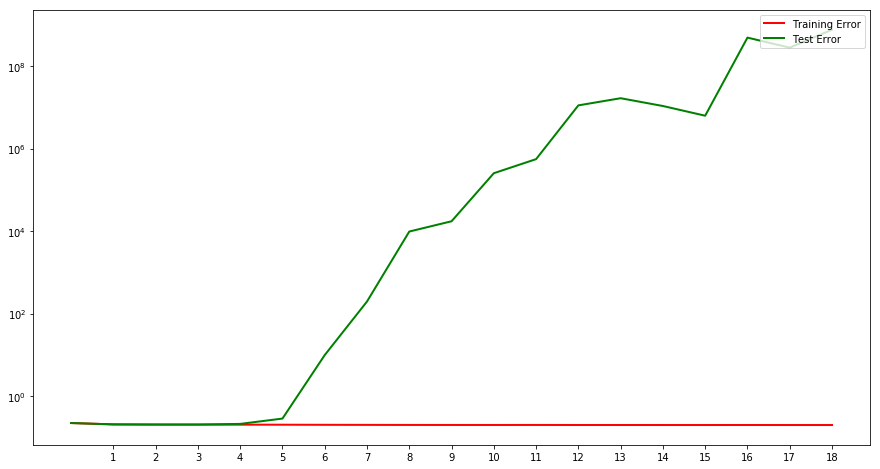

In [3]:
degrees = np.array(range(0,19))
learners = [ [] ]*len(degrees)
errT = np.zeros((len(degrees),))
errV = np.zeros((len(degrees),))
for degree in degrees:
    XtrP = ml.transforms.fpoly_mono(Xtr, degree, bias=False) # generate polynomial feature
    XtrP, params = ml.transforms.rescale(XtrP) # normalize scale & save trans
    XteP = ml.transforms.fpoly_mono(Xte, degree, bias=False)
    XteP, params = ml.transforms.rescale(XteP)
    learners[degree] = ml.linear.linearRegress( XtrP, Ytr )

    errT[degree] = learners[degree].mse(XtrP,Ytr)
    errV[degree] = learners[degree].mse(XteP,Yte)
     
    
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(degrees,errT,'r-',degrees,errV,'g-',linewidth=2);
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.legend(['Training Error','Test Error'],loc='upper right');

plt.show()



In [11]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
XteP = ml.transforms.fpoly_mono(Xte, 4, bias=False) # generate polynomial feature
XteP, params = ml.transforms.rescale(XteP) # normalize scale & save trans
print(learners[4].predict(XteP))
print(learners[4].predict(XteP).shape)
Yte = np.vstack((np.arange(Xte.shape[0]), learners[4].predict(XteP).reshape(200000))).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Y_submit_linearC.txt',Yte,'%d, %.2f',header='ID,Prob1',comments='',delimiter=',')



[[ 0.23014387]
 [ 0.46161732]
 [ 0.13668993]
 ..., 
 [ 0.14321312]
 [ 0.25832283]
 [ 0.25570238]]
(200000, 1)


In [ ]:
plt.plot()